# Capstone: Sprint 3: Advanced Modeling (Data Processing)
Yael Brown \
November 14, 2024 

In [4]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [6]:
# Suppress warnings in the notebook
warnings.filterwarnings("ignore")

In [12]:
# Load processed dataframe
df = pd.read_csv("../data/btc_trans_data/data_raw/btc_data_cleaned.csv")

print(df.shape, "\n")
print(df.info(), "\n")
print(df.head(), "\n")

(80120, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80120 entries, 0 to 80119
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            80120 non-null  int64  
 1   source_address       80120 non-null  object 
 2   destination_address  80120 non-null  object 
 3   satoshi              80120 non-null  float64
 4   year                 80120 non-null  int64  
 5   month                80120 non-null  int64  
 6   day                  80120 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 4.3+ MB
None 

    timestamp                      source_address  \
0  1456791197  16ZZav1Cq5STgj7X5bvP9UgVYJkRk2RDdC   
1  1456791197  16ZZav1Cq5STgj7X5bvP9UgVYJkRk2RDdC   
2  1456791197  1NcktapNVSfbH9FZ9mWZcgMaaokNj9Goyo   
3  1456791197  1NcktapNVSfbH9FZ9mWZcgMaaokNj9Goyo   
4  1456791197  1PaQM5ngUGzZYS3e9epbY7BiZvrukDoJQB   

                  destination_address    

## Add price in USD to dataframe
Add the price as a column in the dataframe. Then use that to analyze the price data later on in the notebook. 

In [23]:
btc_prices = pd.read_csv("../data/btc_price_BTC-USD.csv")

btc_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [25]:
btc_prices.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704
2712,2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160


In [33]:
btc_prices.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [39]:
# Only extract data and closing price. (Close is assumed at midnight since crypto market is 24/7)
btc_prices.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

btc_prices.columns

Index(['Date', 'Close'], dtype='object')

In [51]:
# Convert date Object Dtype to date object
btc_prices['Date'] = pd.to_datetime(btc_prices['Date'])
btc_prices.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2713 non-null   datetime64[ns]
 1   Close   2713 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 42.5 KB


In [59]:
btc_prices = btc_prices[(btc_prices['Date'] >= '2016-03-01') & (btc_prices['Date'] <= '2016-03-13')]


In [83]:
# btc_prices.index = [n for n in range(1,14)
btc_prices

,Date,Close
1,2016-03-01,435.122986
2,2016-03-02,423.989014
3,2016-03-03,421.651001
4,2016-03-04,410.938995
5,2016-03-05,400.570007
6,2016-03-06,407.707001
7,2016-03-07,414.321014
8,2016-03-08,413.971985
9,2016-03-09,414.859985
10,2016-03-10,417.131012


<Axes: title={'center': 'BTC Price for March 1 to 13th'}, xlabel="Day in March '16", ylabel='Price USD'>

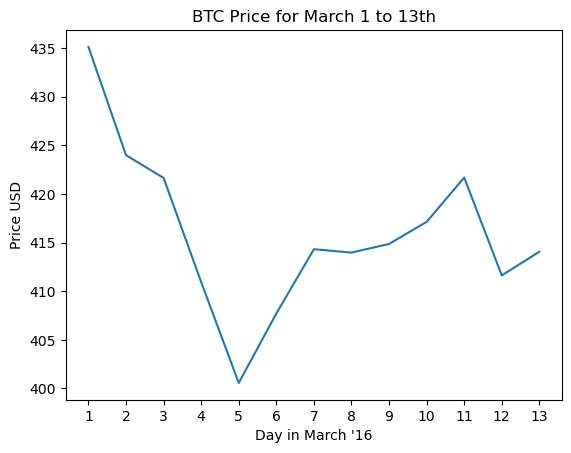

In [99]:
# Graph usd price of bitcoin during period of sample data
btc_prices['Close'].plot(
    kind='line', 
    title='BTC Price for March 1 to 13th', 
    ylabel='Price USD', 
    xlabel="Day in March '16",
    xticks=[n for n in range(1,14)]
)

In [87]:
# Initialize price column in main dataframe
df['btc_usd_price'] = 0

df.head()

,timestamp,source_address,destination_address,satoshi,year,month,day,btc_usd_price
0,1456791197,16ZZav1Cq5STgj7X5bvP9UgVYJkRk2RDdC,1KgqD2G2NSZYgHk5m7AW3wxupDj3H76Q8e,156555.0,2016,3,1,0
1,1456791197,16ZZav1Cq5STgj7X5bvP9UgVYJkRk2RDdC,1NZF5BEn5iCe655fj4vd5UMaXXfVvFH5aJ,26400000.0,2016,3,1,0
2,1456791197,1NcktapNVSfbH9FZ9mWZcgMaaokNj9Goyo,1NXmUs99Rn8FzyYMK5bmBAPL81VzmPhH9d,245057610.0,2016,3,1,0
3,1456791197,1NcktapNVSfbH9FZ9mWZcgMaaokNj9Goyo,1NcktapNVSfbH9FZ9mWZcgMaaokNj9Goyo,48151.0,2016,3,1,0
4,1456791197,1PaQM5ngUGzZYS3e9epbY7BiZvrukDoJQB,14jvp9Sj4peh28CKxifLob2jsZAcYPfZ74,20860000.0,2016,3,1,0


In [89]:
print(df.info())
print(btc_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80120 entries, 0 to 80119
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            80120 non-null  int64  
 1   source_address       80120 non-null  object 
 2   destination_address  80120 non-null  object 
 3   satoshi              80120 non-null  float64
 4   year                 80120 non-null  int64  
 5   month                80120 non-null  int64  
 6   day                  80120 non-null  int64  
 7   btc_usd_price        80120 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 4.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 1 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13 non-null     datetime64[ns]
 1   Close   13 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 

In [107]:
btc_prices.iloc[2]

Date     2016-03-03 00:00:00
Close             421.651001
Name: 3, dtype: object

In [133]:
df.iloc[1]

timestamp                                      1456791197
source_address         16ZZav1Cq5STgj7X5bvP9UgVYJkRk2RDdC
destination_address    1NZF5BEn5iCe655fj4vd5UMaXXfVvFH5aJ
satoshi                                        26400000.0
year                                                 2016
month                                                   3
day                                                     1
btc_usd_price                                           0
Name: 1, dtype: object

In [141]:
btc_prices.iloc[1]['Close']

423.989014

In [188]:
# Use for loop and add prices to usd
idx = 0
for i in range(0,(df.shape[0]-1)): 
    if i % 800 == 0: print(("%.2f" % (i/df.shape[0])) + "%")
    try:     
        # Match the date to the day in the df dataframe
        df.iloc[i, df.columns.get_loc('btc_usd_price')] = btc_prices.iloc[df.iloc[i]['day']]['Close']
    except Exception as e: 
        print("Error with: ", i, "\n")
        print(e)

print("done")

0.00%
0.01%
0.02%
0.03%
0.04%
0.05%
0.06%
0.07%
0.08%
0.09%
0.10%
0.11%
0.12%
0.13%
0.14%
0.15%
0.16%
0.17%
0.18%
0.19%
0.20%
0.21%
0.22%
0.23%
0.24%
0.25%
0.26%
0.27%
0.28%
0.29%
0.30%
0.31%
0.32%
0.33%
0.34%
0.35%
0.36%
0.37%
0.38%
0.39%
0.40%
0.41%
0.42%
0.43%
0.44%
0.45%
0.46%
0.47%
0.48%
0.49%
0.50%
0.51%
0.52%
0.53%
0.54%
0.55%
0.56%
0.57%
0.58%
0.59%
0.60%
0.61%
0.62%
0.63%
0.64%
0.65%
0.66%
0.67%
0.68%
0.69%
0.70%
0.71%
0.72%
0.73%
0.74%
0.75%
0.76%
0.77%
0.78%
0.79%
0.80%
0.81%
0.82%
0.83%
0.84%
0.85%
0.86%
0.87%
0.88%
0.89%
0.90%
0.91%
0.92%
0.93%
0.94%
0.95%
0.96%
0.97%
0.98%
0.99%
1.00%
Error with:  80111 

single positional indexer is out-of-bounds
Error with:  80112 

single positional indexer is out-of-bounds
Error with:  80113 

single positional indexer is out-of-bounds
Error with:  80114 

single positional indexer is out-of-bounds
Error with:  80115 

single positional indexer is out-of-bounds
Error with:  80116 

single positional indexer is out-of-bounds
Error with

In [196]:
# Manually add rows that errored out
for i in range(80111, 80119):
    print(f"{i}: {df.iloc[i]['day']}")
    df.iloc[i, df.columns.get_loc('btc_usd_price')] = 414.065002

80111: 13
80112: 13
80113: 13
80114: 13
80115: 13
80116: 13
80117: 13
80118: 13


In [202]:
# Forgot a row
df['btc_usd_price'].value_counts()

btc_usd_price
423.989014    78013
421.690002      356
410.938995      312
414.859985      265
414.065002      258
417.131012      240
400.570007      187
407.707001      143
421.651001      123
411.623993      106
414.321014       67
413.971985       49
0.000000          1
Name: count, dtype: int64

In [200]:
# Verify prices
print(df.head())
print(df.tail())

    timestamp                      source_address  \
0  1456791197  16ZZav1Cq5STgj7X5bvP9UgVYJkRk2RDdC   
1  1456791197  16ZZav1Cq5STgj7X5bvP9UgVYJkRk2RDdC   
2  1456791197  1NcktapNVSfbH9FZ9mWZcgMaaokNj9Goyo   
3  1456791197  1NcktapNVSfbH9FZ9mWZcgMaaokNj9Goyo   
4  1456791197  1PaQM5ngUGzZYS3e9epbY7BiZvrukDoJQB   

                  destination_address      satoshi  year  month  day  \
0  1KgqD2G2NSZYgHk5m7AW3wxupDj3H76Q8e     156555.0  2016      3    1   
1  1NZF5BEn5iCe655fj4vd5UMaXXfVvFH5aJ   26400000.0  2016      3    1   
2  1NXmUs99Rn8FzyYMK5bmBAPL81VzmPhH9d  245057610.0  2016      3    1   
3  1NcktapNVSfbH9FZ9mWZcgMaaokNj9Goyo      48151.0  2016      3    1   
4  14jvp9Sj4peh28CKxifLob2jsZAcYPfZ74   20860000.0  2016      3    1   

   btc_usd_price  
0     423.989014  
1     423.989014  
2     423.989014  
3     423.989014  
4     423.989014  
        timestamp                      source_address  \
80115  1457830858  1MK7rfErwuWf12vuLxWBkn8ed9PXaeTF7W   
80116  1457833934  1

In [206]:
# Forgot the last row
df.iloc[80119, df.columns.get_loc('btc_usd_price')] = 414.065002

df.tail()

,timestamp,source_address,destination_address,satoshi,year,month,day,btc_usd_price
80115,1457830858,1MK7rfErwuWf12vuLxWBkn8ed9PXaeTF7W,18cfossjDMSrmtmeshBrbiFzzGSHQyaVoV,20000.0,2016,3,13,414.065002
80116,1457833934,1N53mh1gBy9RUkqXRU85G3kU6UXmCDTSju,145NwE6sVnMTTVD4zaiwHjpUTsoSunX3TD,50000000.0,2016,3,13,414.065002
80117,1457834684,1FMYrwgYhCA71C555WWiQyi18tMPQfXGab,18cfossjDMSrmtmeshBrbiFzzGSHQyaVoV,150000.0,2016,3,13,414.065002
80118,1457834684,13aPPSgHfd7XeJSm4b3zUm3i8CT9MEqWQp,18cfossjDMSrmtmeshBrbiFzzGSHQyaVoV,150000.0,2016,3,13,414.065002
80119,1457834684,1Kf63JkwP8yYuSQir4HxQtrXbjJTLu16Za,18cfossjDMSrmtmeshBrbiFzzGSHQyaVoV,150000.0,2016,3,13,414.065002


In [208]:
df['btc_usd_price'].value_counts()

btc_usd_price
423.989014    78013
421.690002      356
410.938995      312
414.859985      265
414.065002      259
417.131012      240
400.570007      187
407.707001      143
421.651001      123
411.623993      106
414.321014       67
413.971985       49
Name: count, dtype: int64

## Convert Satoshi to BTC
Convert the Satoshi column to BTC. So it is easier to calculate the usd value. 

In [215]:
df['price_btc'] = 0

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80120 entries, 0 to 80119
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            80120 non-null  int64  
 1   source_address       80120 non-null  object 
 2   destination_address  80120 non-null  object 
 3   satoshi              80120 non-null  float64
 4   year                 80120 non-null  int64  
 5   month                80120 non-null  int64  
 6   day                  80120 non-null  int64  
 7   btc_usd_price        80120 non-null  float64
 8   price_btc            80120 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 5.5+ MB


In [223]:
# Rename columns to be consistent with naming conventions
df.rename(columns={'btc_usd_price': 'price_btc_usd', 'satoshi': 'price_satoshi'}, inplace=True)

In [227]:
# Add column for value of transaction in usd
df['price_tx_usd'] = 0

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80120 entries, 0 to 80119
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            80120 non-null  int64  
 1   source_address       80120 non-null  object 
 2   destination_address  80120 non-null  object 
 3   price_satoshi        80120 non-null  float64
 4   year                 80120 non-null  int64  
 5   month                80120 non-null  int64  
 6   day                  80120 non-null  int64  
 7   price_btc_usd        80120 non-null  float64
 8   price_btc            80120 non-null  int64  
 9   price_tx_usd         80120 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 6.1+ MB


In [239]:
# Define method to calculate tx value and btc value
def calc_btc_tx_value(row):
    def _sat_to_btc(sats):
        return sats / 100000000

    row['price_btc'] = _sat_to_btc(row['price_satoshi'])
    row['price_tx_usd'] = row['price_btc'] * row['price_btc_usd']

    return row

In [243]:
# Convert Satoshi to usd, also calculate the transfer value
df = df.apply(calc_btc_tx_value, axis=1)

df.tail()

,timestamp,source_address,destination_address,price_satoshi,year,month,day,price_btc_usd,price_btc,price_tx_usd
80115,1457830858,1MK7rfErwuWf12vuLxWBkn8ed9PXaeTF7W,18cfossjDMSrmtmeshBrbiFzzGSHQyaVoV,20000.0,2016,3,13,414.065002,0.0002,0.082813
80116,1457833934,1N53mh1gBy9RUkqXRU85G3kU6UXmCDTSju,145NwE6sVnMTTVD4zaiwHjpUTsoSunX3TD,50000000.0,2016,3,13,414.065002,0.5000,207.032501
80117,1457834684,1FMYrwgYhCA71C555WWiQyi18tMPQfXGab,18cfossjDMSrmtmeshBrbiFzzGSHQyaVoV,150000.0,2016,3,13,414.065002,0.0015,0.621098
80118,1457834684,13aPPSgHfd7XeJSm4b3zUm3i8CT9MEqWQp,18cfossjDMSrmtmeshBrbiFzzGSHQyaVoV,150000.0,2016,3,13,414.065002,0.0015,0.621098
80119,1457834684,1Kf63JkwP8yYuSQir4HxQtrXbjJTLu16Za,18cfossjDMSrmtmeshBrbiFzzGSHQyaVoV,150000.0,2016,3,13,414.065002,0.0015,0.621098


In [247]:
# Curious; look at stats for the value of USD in this dataset
df['price_tx_usd'].describe()

count     80120.000000
mean       5746.257060
std       27651.794181
min           0.007449
25%           0.814379
50%          14.248753
75%         423.989014
max      575776.491667
Name: price_tx_usd, dtype: float64

## Integrate Heist Data
Integrating the heist dataframe into the current dataframe. Then we can declare which rows are possible fraud. 

In [269]:
# Read in heist data
heist_df = pd.read_csv('../data/btc_HeistData.csv')

heist_df.shape

(2916697, 10)

In [270]:
# Reduce the size of dataframe
heist_df = heist_df.iloc[:500000]

# drop label, neighbors, looped, count, weight, length, income
heist_df.drop(columns=['label', 'neighbors', 'looped', 'count', 'weight', 'length', 'income'], axis=1, inplace=True)

In [271]:
# Back up previous main dataframe
df_copy = df.copy()

In [272]:
# Convert day to month and day
heist_temp = heist_df # This made it easier to develop this process and I can switch from temp dataframe to heist_df and not worry about messing up the code

# Rename column
heist_temp.rename(columns={'day': 'day_of_year'}, inplace=True)

# Verify rename
print(heist_temp.info())

# Instantiate day and month columns that we need
heist_temp['day'] = 0
heist_temp['month'] = 0

# Add month and day (calculate it from day_of_year
# (I couldn't get df.apply() to work and reassign both columns at once) 
length = len(heist_temp)

print("heist length: ", heist_temp.shape[0])

cnt = 0
for r in range(0, length):
    if cnt % 1000 == 0: print(("%.2f" % (cnt/heist_temp.shape[0])) + "%")
    row = heist_temp.iloc[r]
    date = pd.to_datetime(row['day_of_year'], format='%j', errors='coerce') + pd.DateOffset(years=row['year'] - 1970)
    row['month'] = date.month
    row['day'] = date.day
    heist_temp.iloc[r] = row
    cnt += 1

# Drop day_of_year column
heist_temp.drop(columns=['day_of_year'], axis=1, inplace=True)

# Assign back to heist_df
heist_df = heist_temp

# Clean up memory
del heist_temp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   address      500000 non-null  object
 1   year         500000 non-null  int64 
 2   day_of_year  500000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 11.4+ MB
None
heist length:  500000
0.00%
0.00%
0.00%
0.01%
0.01%
0.01%
0.01%
0.01%
0.02%
0.02%
0.02%
0.02%
0.02%
0.03%
0.03%
0.03%
0.03%
0.03%
0.04%
0.04%
0.04%
0.04%
0.04%
0.05%
0.05%
0.05%
0.05%
0.05%
0.06%
0.06%
0.06%
0.06%
0.06%
0.07%
0.07%
0.07%
0.07%
0.07%
0.08%
0.08%
0.08%
0.08%
0.08%
0.09%
0.09%
0.09%
0.09%
0.09%
0.10%
0.10%
0.10%
0.10%
0.10%
0.11%
0.11%
0.11%
0.11%
0.11%
0.12%
0.12%
0.12%
0.12%
0.12%
0.13%
0.13%
0.13%
0.13%
0.13%
0.14%
0.14%
0.14%
0.14%
0.14%
0.15%
0.15%
0.15%
0.15%
0.15%
0.16%
0.16%
0.16%
0.16%
0.16%
0.17%
0.17%
0.17%
0.17%
0.17%
0.18%
0.18%
0.18%
0.18%
0.18%
0.19%
0.19%
0.19%
0.19%
0.19%
0.20%
0.20%
0.

In [277]:
# Check heist df
heist_df.head()

,address,year,day,month
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,1
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,12,5
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,3,9
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,18,11
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,26,8


In [281]:
heist_addresses_set = set(heist_df['address'])

len(heist_addresses_set)

373514

In [289]:
heist_addresses_set

{'1PizrduoaaVaYZNWgF7qKC25iZxY8VbNWM',
 '1euFB3UaM1WYk9Ag3FnfCpvP2r9yozYrT',
 '15gcBex5KcEUQanjEEw5hVdy6kUaQmubem',
 '13mPmusbz3F8gGsmWrgYPmFeFihjZUHkES',
 '1ASF2ubPZzgxiSC4WWm4ebkqUTjjLXkyzA',
 '1EgYeAf8jFciFfPvmFwf7TVmNz9G8CaqXh',
 '125mLeC6mJFYtjXdWuQGAC8e5AMsAQjr7r',
 '18fbNG1dqT8H93vmgs24CnrgMUU9sYRr4m',
 '1G9ncJGa2b2NbP3DJyskAGWLoRW7Rsquby',
 '17fTJ2Epf7d9skDn21HChFrZc597aZWve7',
 '1KTm9k8SBhewYp8VppHCMLEPf8LYD5L7My',
 '12VtvUgHGEoQBkRFuyXdNyEiEKzJcX7Yuz',
 '1NvPYpSVj4aibFRXcHQnsKShtfwToQqJS8',
 '1HC3SuXh7QE8JPis91A96XdLLsLQTMv5qN',
 '13rLY3M67CqHe9oM3VWMpYCmZDykPdNHKZ',
 '1AXmGZxvYLaXCxKDg6GuPCJUSFw8o1irqG',
 '1CBMv9VaSWkKvqEgg2VjUkKoZFkC5KDPw3',
 '18RQoKXJFShQigPobttwxGBgbM1EopgMPw',
 '18kptBbEq9EPZ2BWWnQ7V987UBgwwzd1k8',
 '13Y5waj6roaP7C2kgwE8c1tU1zPNvbUZMx',
 '1J9WdP8wn7xhL91Du4qHK1CT9VFNUh1sUq',
 '1DsT5uBg4xmoRTAAJmBxQaPnKzxGJtPBVq',
 '1AkdY5r8dfWagAzQ6QZVCiyBcvETdAstCo',
 '1PgDCjoXeGd1h1wHFM6w1qqJGbqHnMNevt',
 '1DyxAVsk6nC8QeCexoC17mJgva3xkwoAFM',
 '141hSuu8N4sk4RFLFBqy7SDi

In [291]:
# Use intersection and union to manipulate sets (Set-Magic) Check for matches
source_addresses = set(df['source_address'])
destination_addresses = set(df['destination_address'])

matches_in_source = heist_addresses_set.intersection(source_addresses)
matches_in_destination = heist_addresses_set.intersection(destination_addresses)

all_matches = matches_in_source.union(matches_in_destination)

print("source_address:", len(matches_in_source))
print("destination_address:", len(matches_in_destination))
print("matching addresses:", len(all_matches))

source_address: 632
destination_address: 508
matching addresses: 683


In [293]:
# Define column
df['is_possible_fraud'] = False

In [295]:
# Convert set to list, then to a pd.Series
heist_set_series = pd.Series(list(heist_addresses_set))

# Change value to True if it's in the set of known heist addresses
df['is_possible_fraud'] = df['source_address'].isin(heist_set_series) | df['destination_address'].isin(heist_set_series)

# Check Value Counts
df['is_possible_fraud'].value_counts()

is_possible_fraud
False    77663
True      2457
Name: count, dtype: int64

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80120 entries, 0 to 80119
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            80120 non-null  int64  
 1   source_address       80120 non-null  object 
 2   destination_address  80120 non-null  object 
 3   price_satoshi        80120 non-null  float64
 4   year                 80120 non-null  int64  
 5   month                80120 non-null  int64  
 6   day                  80120 non-null  int64  
 7   price_btc_usd        80120 non-null  float64
 8   price_btc            80120 non-null  float64
 9   price_tx_usd         80120 non-null  float64
 10  is_possible_fraud    80120 non-null  bool   
dtypes: bool(1), float64(4), int64(4), object(2)
memory usage: 6.2+ MB


In [307]:
df.isna().sum()

timestamp              0
source_address         0
destination_address    0
price_satoshi          0
year                   0
month                  0
day                    0
price_btc_usd          0
price_btc              0
price_tx_usd           0
is_possible_fraud      0
dtype: int64

In [317]:
df['is_possible_fraud'] = df['is_possible_fraud'].astype(int)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80120 entries, 0 to 80119
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            80120 non-null  int64  
 1   source_address       80120 non-null  object 
 2   destination_address  80120 non-null  object 
 3   price_satoshi        80120 non-null  float64
 4   year                 80120 non-null  int64  
 5   month                80120 non-null  int64  
 6   day                  80120 non-null  int64  
 7   price_btc_usd        80120 non-null  float64
 8   price_btc            80120 non-null  float64
 9   price_tx_usd         80120 non-null  float64
 10  is_possible_fraud    80120 non-null  int32  
dtypes: float64(4), int32(1), int64(4), object(2)
memory usage: 6.4+ MB


In [321]:
# Export for EDA
df.to_csv('../data/sprint3_data_processed.csv')